# Анализ бизнес-показателей мобильного приложения

## Основные положения

### Описание проекта

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Основная задача — разобраться в причинах и помочь компании выйти в плюс.

Для проведения анализа имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях;
- выгрузка их покупок за этот период;
- рекламные расходы.

### Цель работы

Цель работы  - проанализировать окупаемость рекламы  и сформулировать реклмендации для рекламного отдела.

Основные задачи - изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### План выполнения работ

1. Подготовить данные к анализу.
2. Сформировать функции для для расчёта и анализа бизнес-показателей, визуального представления информации.
3. Провести исследовательский анализ по характеру имеющихся данных.
4. Провести анализ расходов на маркетинг.
5. Оценить окупаемость рекламы.

## Выполнение работы

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Проверка на дубликаты

Для того, чтобы проверить на наличие полных дубликатов, а также чтобы визуально оценить наличие неявных дубликатов среди небольшого (до 20 шт.) количества значений, создаем функцию unique_check, которую применим ко всем исходным наборам данных.

In [3]:
def unique_check (df):
    print('Количество строк-полных дубликатов', df.duplicated().sum())
    for i in df.columns:
        nu = df[i].nunique()
        print ('В колонке', i, 'уникальных значений:', nu, end=' ')
        print(', а именно:\n', df[i].value_counts(), '\n') if nu < 20 else print('')

In [4]:
display(visits.head())
display(visits.info())
unique_check (visits)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество строк-полных дубликатов 0
В колонке User Id уникальных значений: 150008 
В колонке Region уникальных значений: 4 , а именно:
 United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64 

В колонке Device уникальных значений: 4 , а именно:
 iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64 

В колонке Channel уникальных значений: 11 , а именно:
 organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64 

В колонке Session Start уникальных значений: 306813 
В колонке Session End уникальных значений: 306793 


<b>Итог.</b> В файле visits_info_short.csv (датафрейм visits) пустых значений и дубликатов нет.

In [5]:
display (orders.head())
display (orders.info())
unique_check (orders)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество строк-полных дубликатов 0
В колонке User Id уникальных значений: 8881 
В колонке Event Dt уникальных значений: 40163 
В колонке Revenue уникальных значений: 5 , а именно:
 4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: Revenue, dtype: int64 



<b>Итог.</b> В файле orders_info_short.csv (датафрейм orders) пустых значений и дубликатов нет.

In [6]:
display(costs.head())
display(costs.info())
unique_check(costs)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество строк-полных дубликатов 0
В колонке dt уникальных значений: 180 
В колонке Channel уникальных значений: 10 , а именно:
 OppleCreativeMedia    180
LeapBob               180
TipTop                180
AdNonSense            180
lambdaMediaAds        180
YRabbit               180
RocketSuperAds        180
WahooNetBanner        180
FaceBoom              180
MediaTornado          180
Name: Channel, dtype: int64 

В колонке costs уникальных значений: 608 


<b>Итог.</b> В файле costs_info_short.csv (датафрейм costs) пустых значений и дубликатов нет.

#### Корректируем названия колонок

Основные действия с названиями колонок:
- преобразуем все буквы в строчные;
- заменяем один или несколько пробелов на одно подчеркивание.

In [7]:
print(visits.columns)
visits.columns = [re.sub(' +', '_', n) for n in visits.columns.str.lower()] # to lower case, than replace 1 or more spaces by '_'
print(visits.columns)

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')
Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')


In [8]:
print(orders.columns)
orders.columns = [re.sub(' +', '_', n) for n in orders.columns.str.lower()] # to lower case, than replace 1 or more spaces by '_'
print(orders.columns)

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')


In [9]:
print(costs.columns)
costs.columns = [re.sub(' +', '_', n) for n in costs.columns.str.lower()] # to lower case, than replace 1 or more spaces by '_'
print(costs.columns)

Index(['dt', 'Channel', 'costs'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


#### Устанавливаем тип колонок с датой

Преобразовываем колонки c датами в datetime, а для затрат оставляем информацию только о дате, так как большая детализация в затратах не требуется.
Сразу проверим корректность данных, проверив минимальные и максимальные значения.

In [10]:
visits['session_start']  = pd.to_datetime(visits['session_start'])
visits['session_end']  = pd.to_datetime(visits['session_end'])
display(visits.info())
print("visits['session_start'].min():", visits['session_start'].min(),
      "\nvisits['session_end'].min():", visits['session_end'].min())
print("\nvisits['session_start'].max():" , visits['session_start'].max(),
      "\nvisits['session_end'].max():" ,visits['session_end'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

visits['session_start'].min(): 2019-05-01 00:00:41 
visits['session_end'].min(): 2019-05-01 00:07:06

visits['session_start'].max(): 2019-10-31 23:59:23 
visits['session_end'].max(): 2019-11-01 01:38:46


In [11]:
orders['event_dt']  = pd.to_datetime(orders['event_dt'])
display(orders.info())
print("orders['event_dt'].min():", orders['event_dt'].min(),
      "\norders['event_dt'].max():", orders['event_dt'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

orders['event_dt'].min(): 2019-05-01 00:28:11 
orders['event_dt'].max(): 2019-10-31 23:56:56


In [12]:
costs['dt']  = pd.to_datetime(costs['dt']).dt.date
display(costs.info())
print("costs['dt'].min():", costs['dt'].min(),
      "\ncosts['dt'].max():", costs['dt'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

costs['dt'].min(): 2019-05-01 
costs['dt'].max(): 2019-10-27


### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Функция get_profiles() для создания профилей пользователей

In [13]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

#### Функция get_retention() — для подсчёта Retention Rate

In [14]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time


#### Функция get_conversion() — для подсчёта конверсии

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция get_ltv() — для подсчёта LTV и ROI

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time  # таблица динамики ROI
    )

#### Функция filter_data() — для сглаживания данных

In [17]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция plot_retention() — для построения графика Retention Rate

Кривые удержания и динамика удержания на день горизонта.

In [18]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

#### Функция plot_conversion() — для построения графика конверсии

Результатом её вызова будут два графика: кривые конверсии и динамика конверсии на день горизонта.

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция plot_ltv_roi — для визуализации LTV и ROI

Результатом вызова функции станут:
- кривые LTV,
- кривые ROI,
- график истории изменений LTV,
- график истории изменений ROI,
- график истории изменений CAC.

Графики, отражающие динамику метрик, сгладим функцией filter_data().

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

Задачи:
- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

#### Создание профилей пользователей

In [21]:
profiles = get_profiles(visits, orders, costs)
display(profiles)
print('Минимальная дата:', profiles['dt'].min())
print('Максимальная дата:', profiles['dt'].max())

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

Минимальная дата: 2019-05-01
Максимальная дата: 2019-10-27


<b>Вывод</b>

В таблице 150 008 профилей пользователей. Минимальная дата привлечения - 1 мая 2019 года, максимальная дата - 27 октября 2019 года.

Даты записей о первых визитах пользователей соответствуют информации в описании проекта - с 1 мая по 27 октября 2019 года. Последняя сессия начинается 31.10.2019, что как раз предшествует условной дате выполнения анализа - 1.11.2019.

#### Пользователи по странам

In [22]:
prof_regions = (profiles
                .groupby('region')
                .agg(
                    user_number = ('user_id','count'),
                    payer_count = ('payer','sum'),
                    payer_share = ('payer', 'mean'))
                .sort_values(by='user_number', ascending=False)
               )
prof_regions.style.format({
    'user_number': '{:,.0f}'.format,
    'payer_count': '{:,.0f}'.format,
    'payer_share': '{:,.2%}'.format,
})

<b>Вывод</b>

1. Пользователи приходят в приложение из четырех стран: United States, UK, France, Germany. 
2. Больше всего платящих пользователей приходится на United States
3. В таблице представлена колонка 'user_number' c количеством пользователей из соответствующей страны, в колонке 'payer_share' представлена доля платящих пользователей среди пользователей своей страны.

#### Устройства у пользователей

In [23]:
user_devices = (profiles
                .groupby('device')
                .agg(
                    user_number = ('user_id','count'),
                    payer_count = ('payer','sum'),
                    payer_share = ('payer', 'mean'))
                .sort_values(by='payer_share', ascending=False)
               )
user_devices.style.format({
    'user_number': '{:,.0f}'.format,
    'payer_count': '{:,.0f}'.format,
    'payer_share': '{:,.2%}'.format,
})

<b>Вывод</b>

- Клиенты пользуются четырьмя типами устройств: Mac, iPhone, Android, PC.
- В таблице в колонке user_number представлено количество пользователей для каждого типа устройств, а в колонке payer_share - доля платящих для каждого из типов.
- Наиболее высокая доля платящих пользователей среди обладателей устройств производства Apple: Mac и iPhone.

#### Рекламные источники

In [24]:
ad_channels = (profiles
                .groupby('channel')
                .agg(
                    user_number = ('user_id','count'),
                    payer_count = ('payer','sum'),
                    payer_share = ('payer', 'mean'))
                .sort_values(by='payer_count', ascending=False)
               )
ad_channels.style.format({
    'user_number': '{:,.0f}'.format,
    'payer_count': '{:,.0f}'.format,
    'payer_share': '{:,.2%}'.format,
})

<b>Вывод</b>

- Больше всего платящих пользователей пришло из каналов: FaceBoom, TipTop, organic, хотя из organic конверсия довольно низкая.
- В построенной таблице в колонке user_number указано количество привлеченных пользователей из каждого канала, а в колонке payer_share - доля платящих для каждого канала привлечения.

### Маркетинг

Задание:
- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [25]:
print('Общая сумма расходов на маркетинг:', costs['costs'].sum())

Общая сумма расходов на маркетинг: 105497.30000000002


#### Распределение трат по рекламным источникам

Таблица затрат с указанием долей по источникам.

In [27]:
ch_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
ch_costs['share'] = ch_costs['costs']/ch_costs['costs'].sum()
ch_costs.style.format({
    'costs': '{:,.2f}'.format,
    'share': '{:,.2%}'.format
})

#### Динамика изменения расходов

Добавим столбцы с номерами недель и месяцев для последующей группировки по ним.

In [28]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.head()

dt   channel  costs  week  month
0  2019-05-01  FaceBoom  113.3    18      5
1  2019-05-02  FaceBoom   78.1    18      5
2  2019-05-03  FaceBoom   85.8    18      5
3  2019-05-04  FaceBoom  136.4    18      5
4  2019-05-05  FaceBoom  122.1    18      5

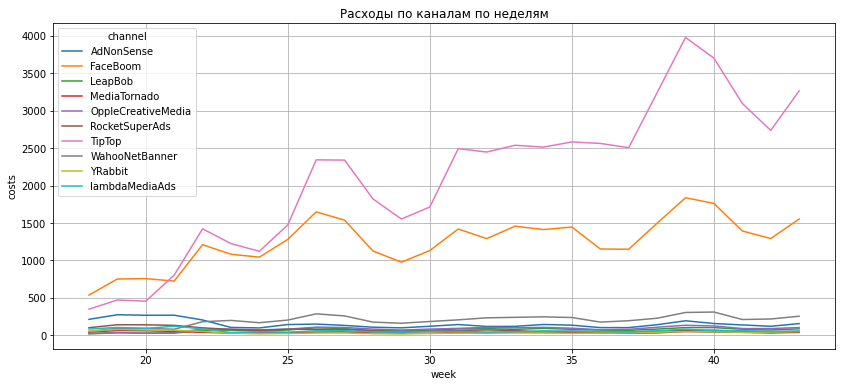

In [29]:
costs.pivot_table(index = 'week', columns = 'channel', values='costs', aggfunc='sum').plot(
    figsize = (14,6),
    ylabel = 'costs',
    title = 'Расходы по каналам по неделям'
)
plt.grid(which='both')

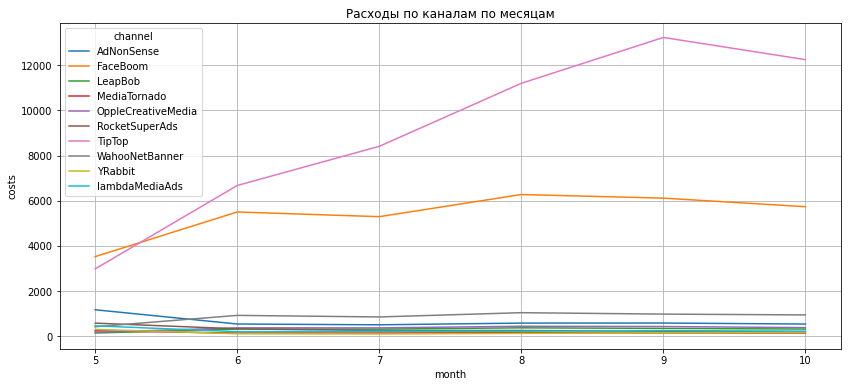

In [30]:
costs.pivot_table(index = 'month', columns = 'channel', values='costs', aggfunc='sum').plot(
    figsize = (14,6),
    ylabel = 'costs',
    title = 'Расходы по каналам по месяцам'
)
plt.grid(which='both')

#### Средняя стоимость привлечения одного пользователя (CAC) из каждого источника

In [31]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [33]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False).round(2)

acquisition_cost
channel                             
TipTop                          2.80
FaceBoom                        1.11
AdNonSense                      1.01
lambdaMediaAds                  0.72
WahooNetBanner                  0.60
RocketSuperAds                  0.41
OppleCreativeMedia              0.25
YRabbit                         0.22
MediaTornado                    0.22
LeapBob                         0.21
organic                         0.00

<b>Выводы</b>

1. Общая сумма расходов на маркетинг составляет 105 497.3 условных единиц.
2. Две наибольших суммы были потрачены на TipTop 54 751.3 у.е. и на FaceBoom 32 445.6 у.е. Далее для других каналов суммы постепенно снижаются от 5 151 у.е. на WahooNetBanner до 944.22 у.е. на YRabbit.
3. По построенным графикам изменения расходов во времени по каждому источнику видно, что расходы на TipTop и на FaceBoom в первую же неделю были выше, чем на остальные каналы. У TipTop они продолжали увеличиваться от месяца к месяцу с небольшими колебаниями между неделями. У FaceBoom, начиная со второго месяца периода (июня), расход практически стабилизировался на одном уровне. У остальных рекламных каналов расход был практически на одном уровне в течение всего периода с малозаметными колебаниями.
4. При расчете CAC, аналогично затратам, наибольшие затраты на привлечение одного пользователя также у TipTop 2.8 у.е. и FaceBoom 1.11 у.е. По другим каналам CAC ниже и прямой зависимости от затрат нет: от 1 у.е. у AdNonSense до 0.25 у OppleCreativeMedia и по 0.22 у YRabbit и MediaTornado и 0.21 у LeapBob. Это без учета нулевой стоимости у organic.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы на 1 ноября 2019 года. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
Задачи:
- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. Аналогично - с удержанием пользователей. Построить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

#### Общие графики LTV, CAC и ROI

In [34]:
observation_date = datetime(2019, 11, 1).date()
horizon = 14
window = 7

Удаляем данные для канала "organic"

In [36]:
profiles_filtered = profiles.query('channel != "organic"')

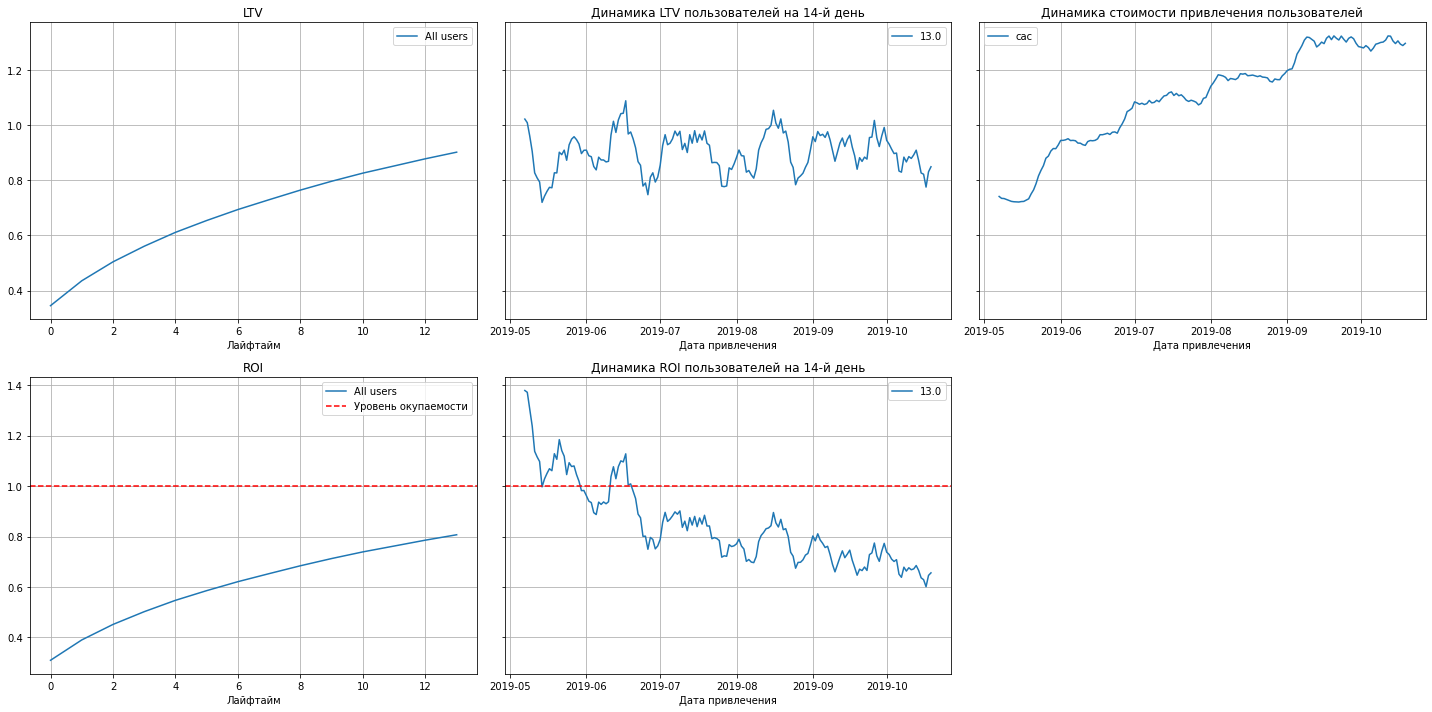

In [37]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

<b>Выводы по общим графикам LTV, CAC и ROI</b>

1. LTV закономерно растет по дням от привлечения пользователя, однако, поскольку график динамики CAC посторен на той же оси Y, то видно, что CAC выше LTV.
2. Динамика LTV демонстрирует, что в первый месяц LTV было достаточно низкое, а затем вышло на постоянный уровень с регулярными колебаниями где-то от 0.6 до 0.8 у.е на 14-й день от привлечения пользователя.Период колебания составляет около месяца.
3. Динамика стоимости привлечения CAC показывает, что эта стоимость постоянно растет определенными скачками приблизительно с месячной периодичностью в начале каждого месяца.
4. График ROI в течение горизонта наблюдения показывает, что, хотя ROI завономерно увеличивается, но, в целом, бизнес не выходит на окупаемость.
5. Гафик динамики ROI показывает, что, если сначала ROI было больше единицы, то с последней трети июня значение ROI не превышает 1. Периодичность всплесков совпадает с периодичностью у LTV, а тренд на понижение согласуется с постоянным ростом CAC.

#### Конверсия и удержание

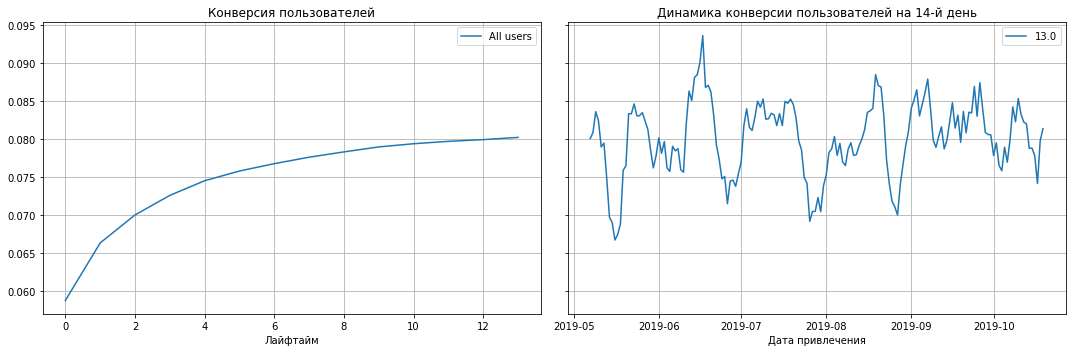

In [40]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon
)
plot_conversion(conversion, conversion_history, horizon) 

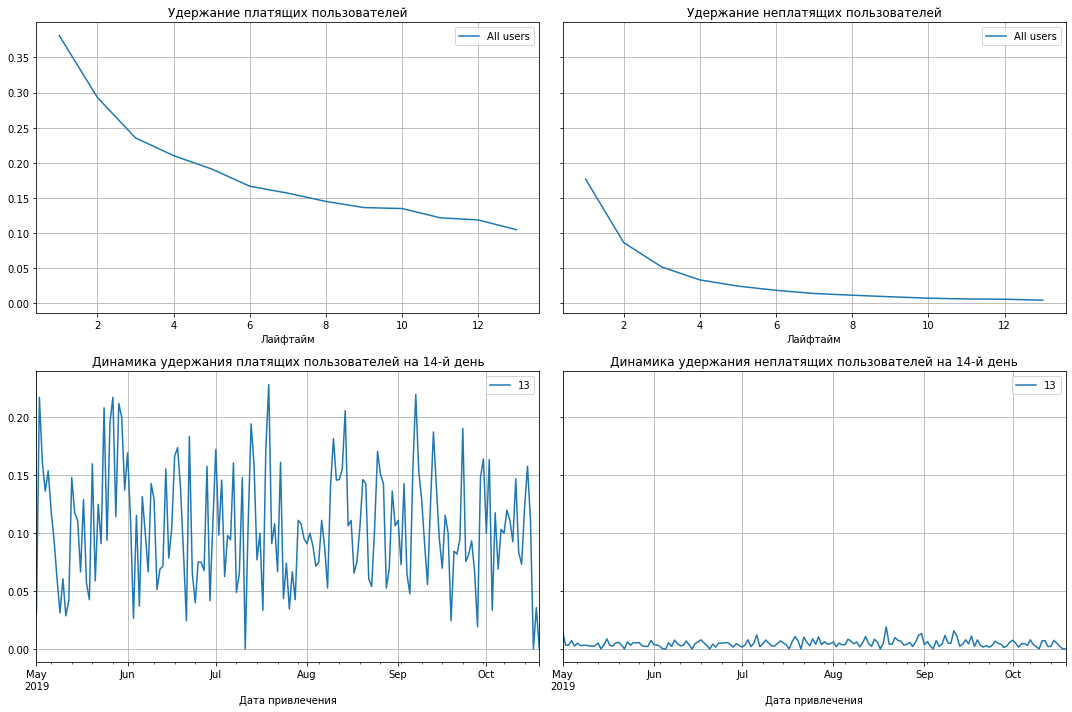

In [41]:
result_raw, retention, retention_history = get_retention(profiles_filtered, visits, observation_date, horizon)
plot_retention(retention, retention_history, horizon)

<b>Выводы по конверсии и удержанию</b>

1. Конверсия пользователей на 14-й день в среднем за весь период не превышает 8,1%.
2. В динамике же реальные значения конверсий на 14-е дни колеблются, при этом амплитуда колебаний за время наблюдений постепенно умеьшается в 2 раза.
3. Кривая удержания платящих пользователей в разы выше аналогичного графика для неплатящих пользователей.
4. В динамике удержание платящих пользователей на 14-й день очень сильно колеблется в пределах между 0% и 25%.
5. Для неплатящих пользователей график удерждания на 14-й день колеблется на уровне 0-2%.

<h4>Конверсия и удержание с разбивкой по устройствам</h4>

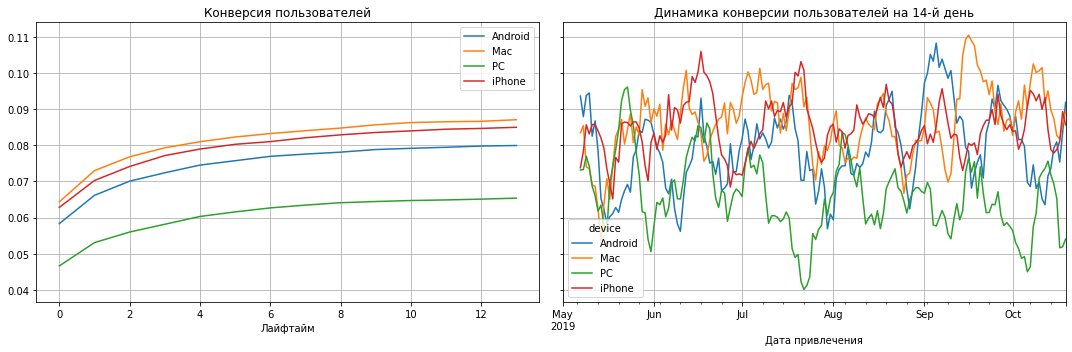

In [42]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['device']
)
plot_conversion(conversion, conversion_history, horizon) 

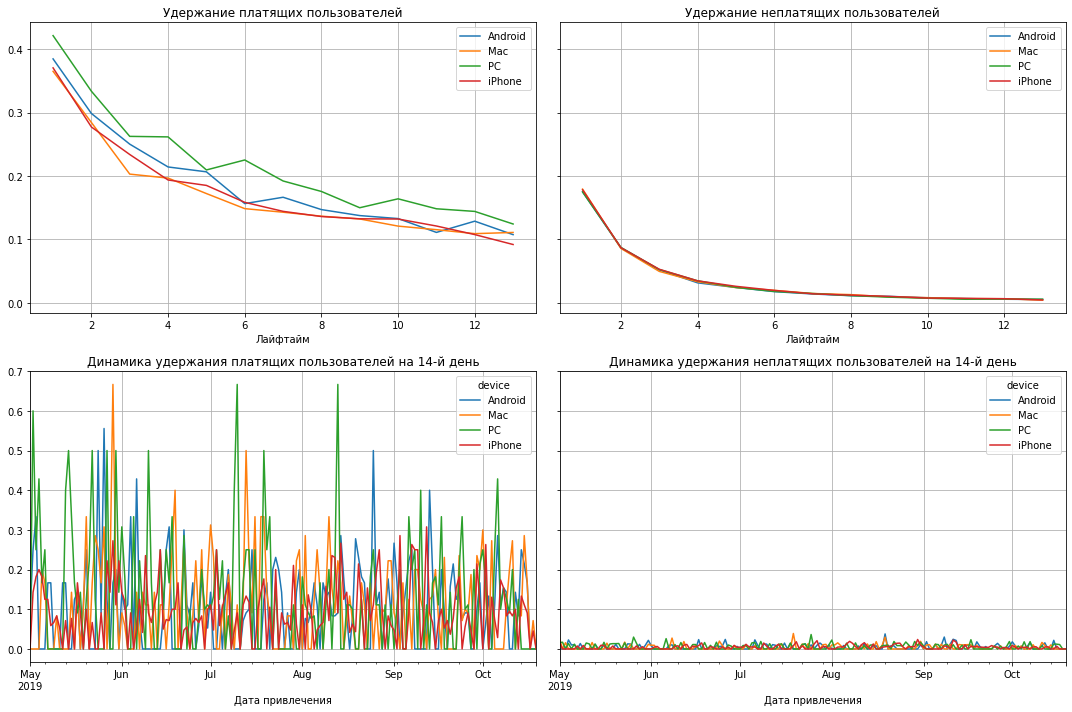

In [43]:
result_raw, retention, retention_history = get_retention(profiles_filtered, visits, observation_date, horizon, dimensions=['device'])
plot_retention(retention, retention_history, horizon)

<b><br>Выводы</b>

1. Конверсия на PC заметно ниже, чем на других устройствах.
2. В динамике конверсии видно, что провалы конверсии на PC часто сопоставлены пикам конверсии по другим устройствам, а основное снижение у PC происходит в июле. Начиная с сентября повышеается уровень конверсии у устройств Mac и Android.
3. По удержанию платящих пользователей показатели немного лучше у PC.
4.  По удержанию неплатящих пользователей картина одинаковая для всех устройств.
5. График динамики удержания платящих пользователей отражает характер графика по горизонту наблюдения, но заметен довольно большой и частый разброс значений.
6. Динамика  удержания неплатящих пользователей схожа для всех устройств.

<h4>Конверсия и удержание с разбивкой по странам</h4>

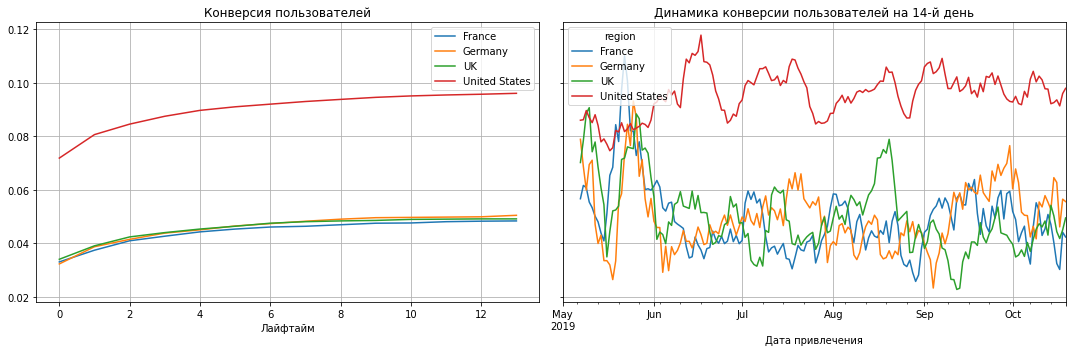

In [44]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['region']
)
plot_conversion(conversion, conversion_history, horizon) 

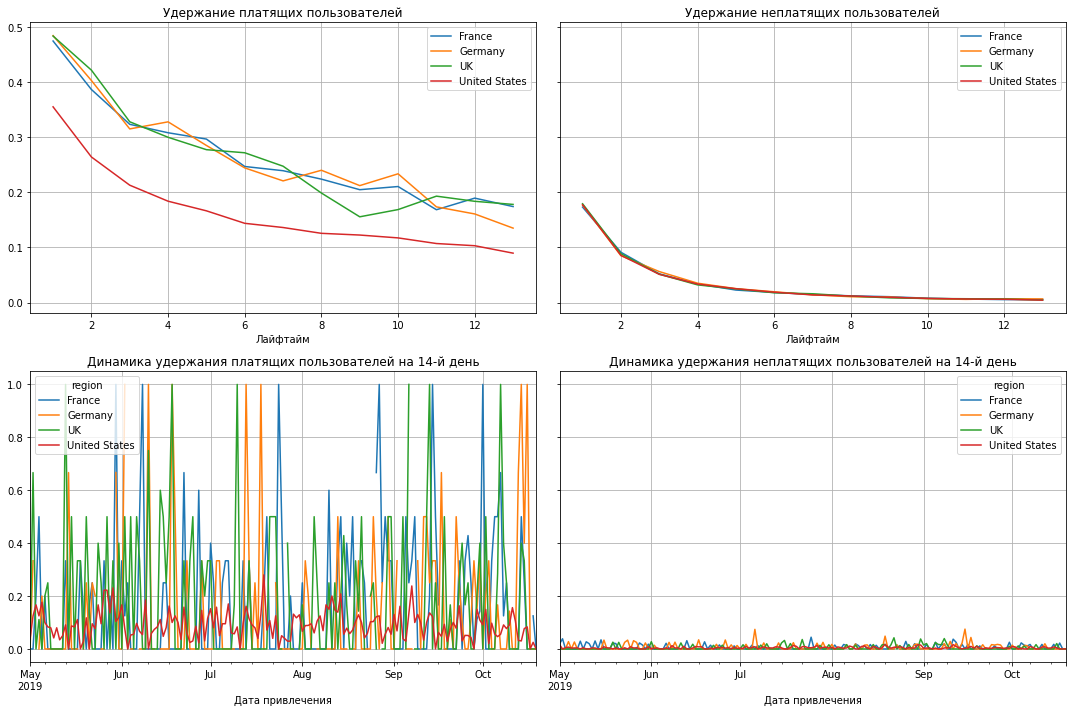

In [45]:
result_raw, retention, retention_history = get_retention(profiles_filtered, visits, observation_date, horizon, dimensions=['region'])
plot_retention(retention, retention_history, horizon)

<b><br>Выводы</b>

1. Конверсия в US заметно выше, чем в других странах.
2. В динамике конверсии видно, что для US она резко идет вверх в июне и затем, имея регулряные отклонения вверх и вниз, постепенно стабилизируется между 9% и 10%, уменьшая со временем отклонения. Для Germany и UK заметно несколько колебательных циклов - с небольшой амплитудой на уровне недели и месяца и с более занчительгной амплитудой с периодом около 3-х месяцев. 
3. По удержанию платящих пользователей у US показатели заметно хуже.
4.  По удержанию неплатящих пользователей картина одинаковая для всех стран.
5. График динамики удержания платящих пользователей отражает характер графика по горизонту наблюдения, но заметен довольно большой и частый разброс значений от 0 до 100%, однако это не характерно для US, в которой максимум не превышает 30%.
6. Динамика  удержания неплатящих пользователей схожа для всех стран.

<h4>Конверсия и удержание с разбивкой по каналам рекламы</h4>

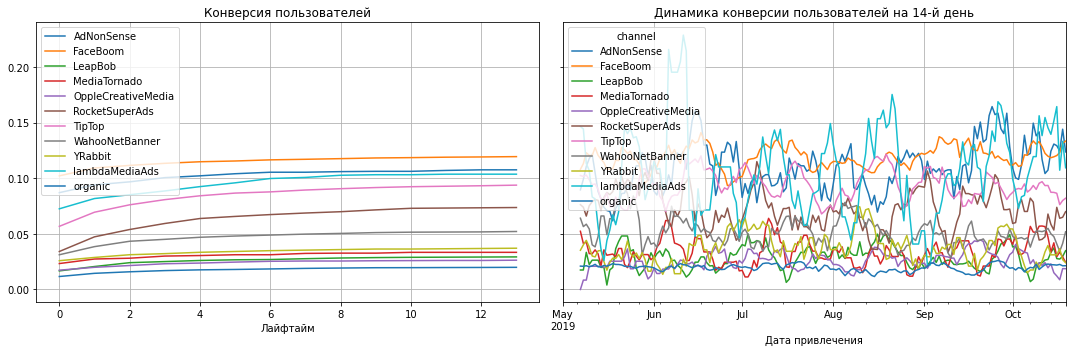

In [46]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, horizon) 

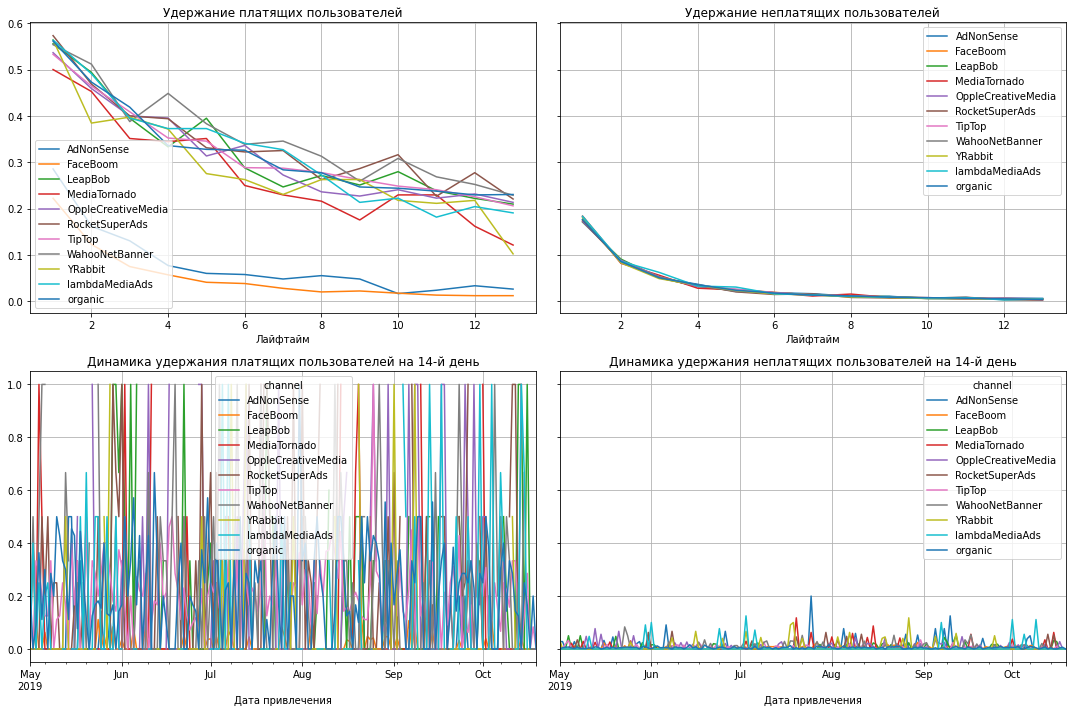

In [47]:
result_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon, dimensions=['channel'])
plot_retention(retention, retention_history, horizon)

<b><br>Выводы</b>

1. Конверсия из FaceBoom немного выше, чем из других каналов.
2. В динамике конверсии видно, что FaceBoom имеет небольшие колебания, в то время, как конверсии пользователей из LambdaMediaAds и AdNoneSense значительно колеблются и регулряно в верхней точке превышают лидера в дологосрочной перспективе FaceBoom. 
3. По удержанию платящих пользователей хорошо заметно, что выделяются две группы каналов. Быстрее всего теряет платящих пользователей группа из FaceBoom и AdNoneSense.
4.  По удержанию неплатящих пользователей картина одинаковая для всех каналов.
5. График динамики удержания платящих пользователей показывает, что день ото дня картина для всех каналов сильно отличается. Однако заметны частые достижения уровней в 100% и 50%. 
6. Динамика  удержания неплатящих пользователей имеет небольшие всплески, но они не превышают 20%, в основном меньше 10%.

#### Окупаемость рекламы с разбивкой по устройствам

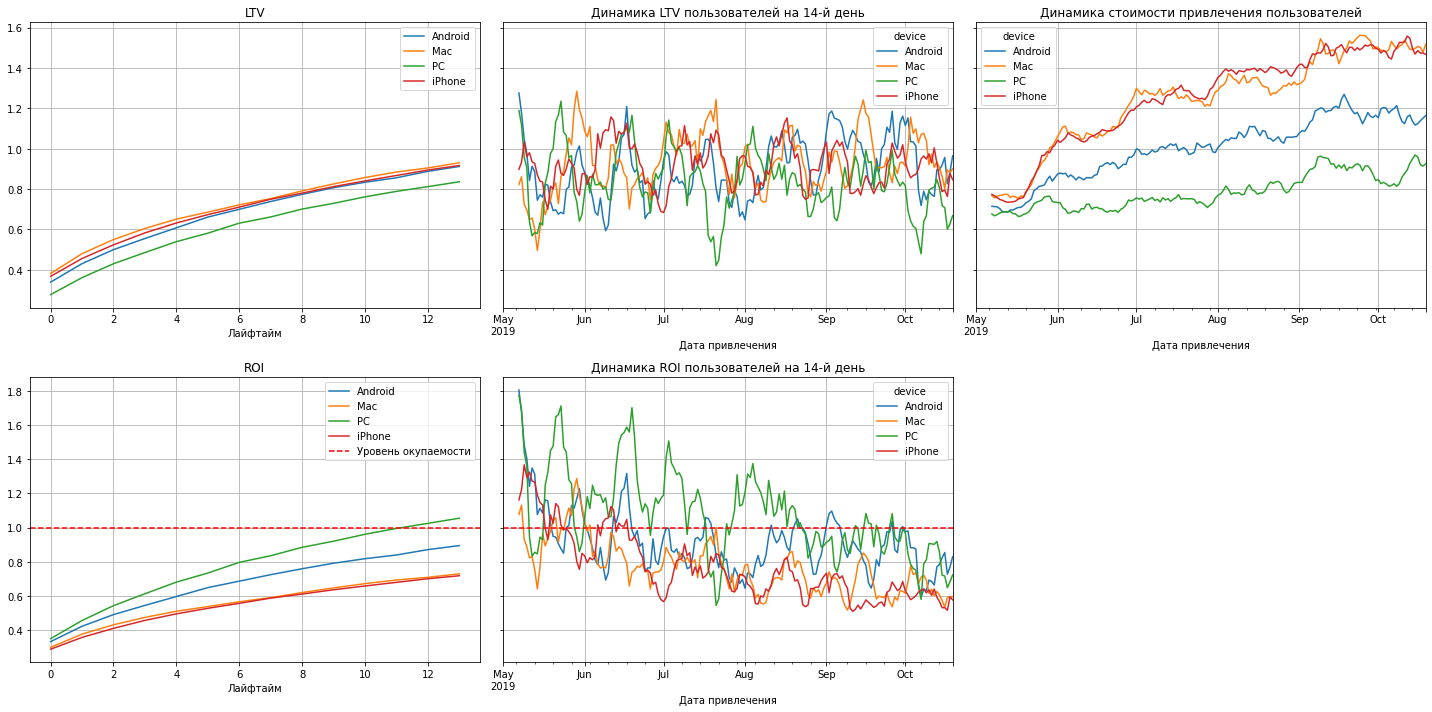

In [48]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['device']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

<b>Выводы по окупаемости рекламы с разбивкой по устройствам</b>

1. В целом LTV c разбивкой по устройствам общем по горизонту наблюдения и в динамике почти не отличаются. Только для устройств PC оно немного ниже.
2. Динамика LTV для всех устройств имеет всплески и спады, но длительность периодов слегка отличаются.
3. Динамика стоимости привлечения пользователей имеет более заметную разницу между устройствами. У Mac и iPhone стоимость привлечения самая высокая, у PC самая низкая, а у Android приблизительно посередине.
4. Графики ROI имеют обратную картину - наоборот, ROI у устройств Apple ниже, у PC выше. Окупаемость (ROI = 1) для PC в среднем наступает на 11-й день, на остальных устойствах в течение горизонта наблюдения ROI не достигает значения 1. 
5. ROI в динамике отражает то же соотношение между собой у разных устройств, но хорошо заметен тренд снижения уровня ROI со временем.

#### Окупаемость рекламы с разбивкой по странам

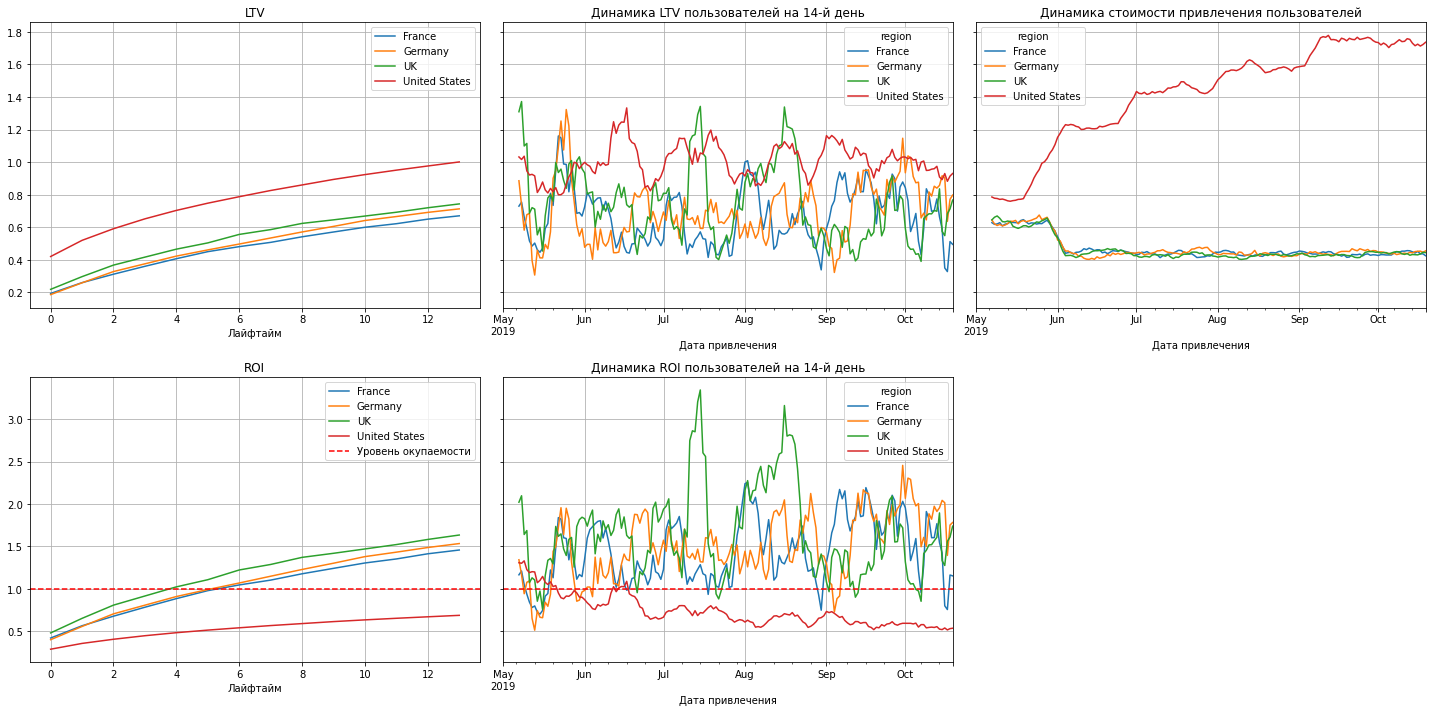

In [49]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

<b>Выводы по окупаемости рекламы с разбивкой по странам</b>

1. Из общей группы кривых LTV по дням горизонта наблюдения слегка выделяется большими значениями линия USA.
2. На графике динамики LTV у всех заметна цикличность колебаний с периодом около месяца.
3. На графике динамики CAC явно в разы выделяется в большую сторону для USA. Остальные страны сопоставимы между собой без заметных отклонений. CAC у USA постоянно астет скачками в начале каждого месяца, у остальных стран, наоборот, в начале июня происходит снижение, затем уровень CAC постоянен. 
4. По картине ROI в отношении горизонта наблюдения заметно, что все страны, кроме USA к 6-му дню уже выходят на самоокупаемость. У USA показатель ROI < 1 на протяжении всего горизонта наблюдения.
5. Динамика ROI у USA с середины июня показывает уход вниз от 1 и стремится к уменьшению, у остальных стран, в основном, значения больше 1 и у UK имеют доволно высокие всплески.

#### Окупаемость рекламы с разбивкой по рекламным каналам

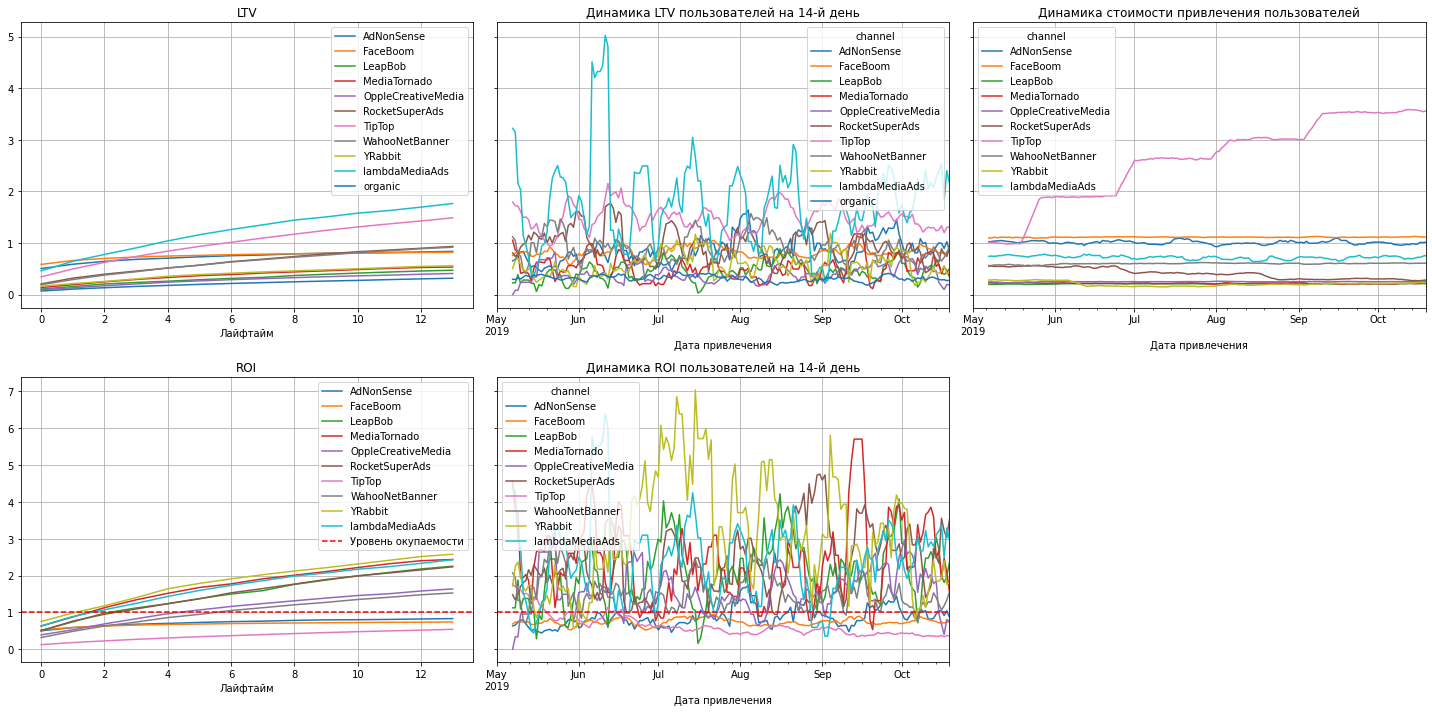

Точные данные на 14-й день для графиков по лайфтайм


'LTV каналов привлечения на 14-й день горизонта наблюдения'

13.0
channel                     
lambdaMediaAds      1.766250
TipTop              1.487908
RocketSuperAds      0.933801
WahooNetBanner      0.918615
AdNonSense          0.838006
FaceBoom            0.821469
YRabbit             0.559668
MediaTornado        0.533684
LeapBob             0.473004
OppleCreativeMedia  0.409118
organic             0.317364

'ROI каналов привлечения на 14-й день горизонта наблюдения'

13.0
channel                     
YRabbit             2.578086
MediaTornado        2.436519
lambdaMediaAds      2.428712
LeapBob             2.252399
RocketSuperAds      2.237019
OppleCreativeMedia  1.637075
WahooNetBanner      1.526304
AdNonSense          0.831337
FaceBoom            0.737790
TipTop              0.539532

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)
print('Точные данные на 14-й день для графиков по лайфтайм')
display("LTV каналов привлечения на 14-й день горизонта наблюдения", ltv[[ltv.columns[14]]].sort_values(by=ltv.columns[14], ascending=False))
print()
display("ROI каналов привлечения на 14-й день горизонта наблюдения", roi[[roi.columns[15]]].sort_values(by=roi.columns[15], ascending=False))

<b>Выводы по окупаемости рекламы с разбивкой по рекламным каналам</b>

1. При оценке LTV выделяется два канала привлечения с наибольшими показателями: lambdaMediaAds и TipTop.
2. На графике динамики LTV для всех каналов заметна цикличность колебаний с периодом около месяца.
3. График динамики CAC показывает, что этот показатель у TipTop возрастает каждый месяц.
4. По графикам распределения ROI по дням горизонта наблюдения видно, что часть каналов переходит через линию окупаемости, а часть (AdNonSense, FaceBoom и TipTop) так и остаются с ROI < 1 на 14-й день наблюдения.
5. Из графика динамики ROI видно, что в моменте некоторые каналы достгают довольно высоких значений, что особенно заметно для YRabbit, который, в целом, за всю историю наблюдения и получил наибольший показатель ROI.

<a name ="Y"></a>
<h4>Показатели для YRabbit, lambdaMediaAds, LeapBob, RocketSuperAds</h4>


Расмотрим более подробно показатели по каналам, у которых максимальные значения ROI и LTV: YRabbit, lambdaMediaAds, LeapBob, RocketSuperAds

In [51]:
profiles_filtered_ch = profiles[profiles['channel'].isin(
    ['YRabbit', 'lambdaMediaAds', 'LeapBob', 'RocketSuperAds'])]

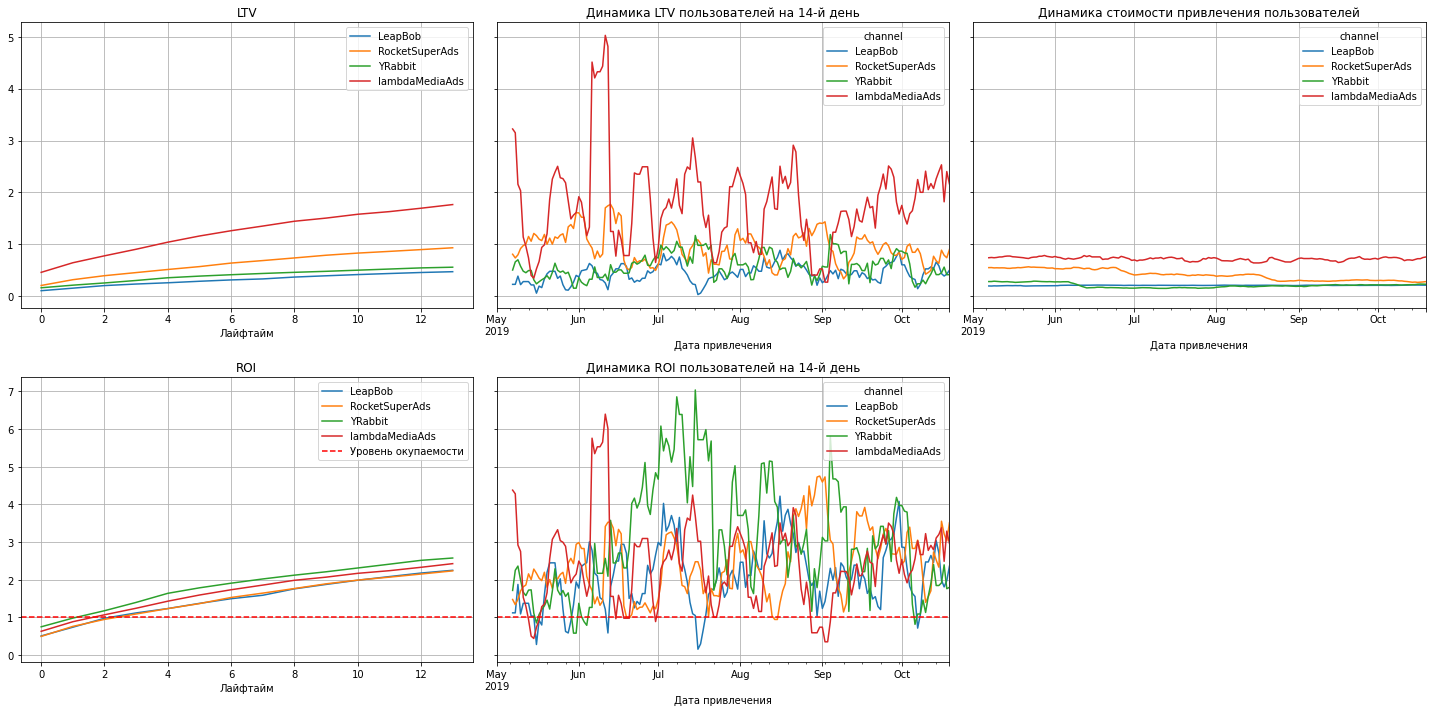

In [52]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtered_ch,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

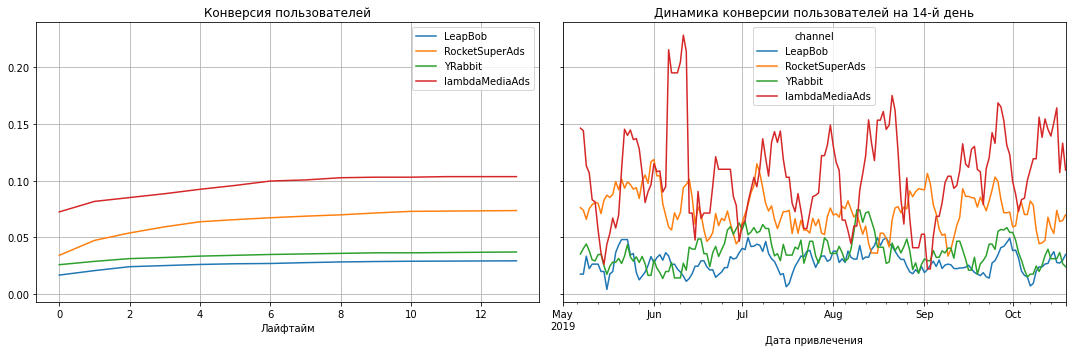

In [53]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtered_ch,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, horizon) 

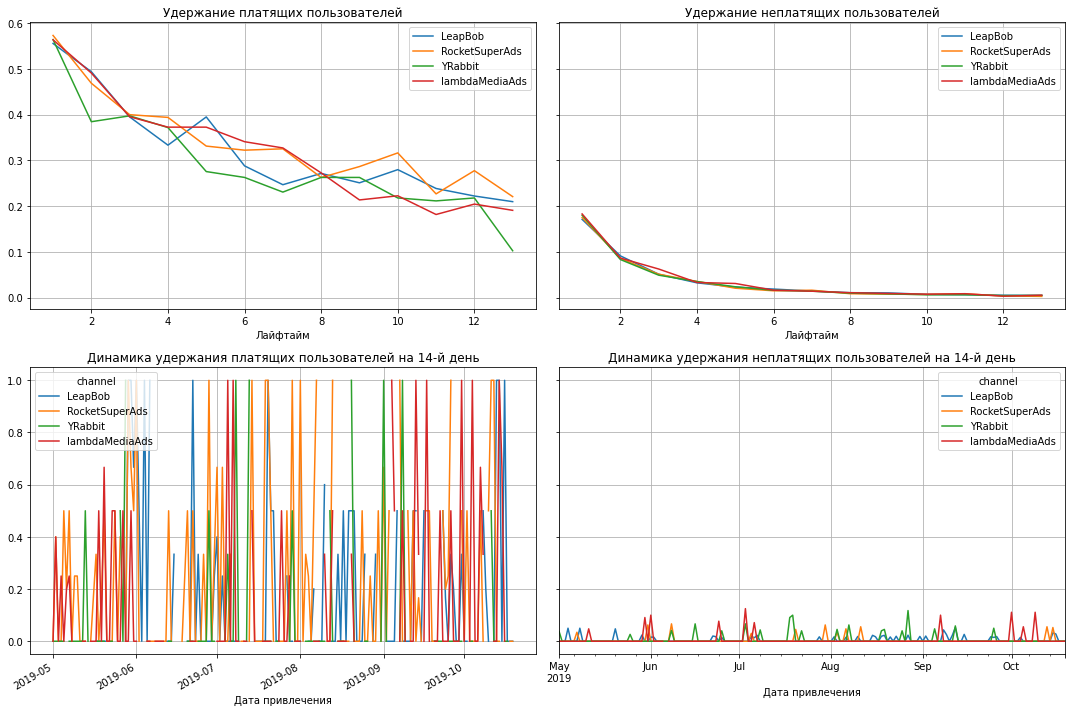

In [54]:
result_raw, retention, retention_history = get_retention(
    profiles_filtered_ch, visits, observation_date,
    horizon, dimensions=['channel'])
plot_retention(retention, retention_history, horizon)

<b>Выводы по каналам YRabbit, lambdaMediaAds, LeapBob, RocketSuperAds</b>
    
1. У lambdaMediaAds и RocketSuperAds довольно высокий LTV
2. В динамике пиковые значения LTV у lambdaMediaAds превышают показатели других, также неплохих каналов, в 3-5 раз.
3. CAC RocketSuperAds и YRabbit хоть и незначительно, но постепенно снижаются
5. По выбранным каналам на 4-й день ROI начинает превышать 1
6. В динамике ROI наибольшие пики наблюдаются у YRabbit
7. Конверсия из lambdaMediaAds и RocketSuperAds значительно выше остальных каналов.
8. Динамика конверсии практически полностью повторяет динамику LTV (см. п.2)
9. Удержание платящих пользователей между данными каналами практически не отличается.
10. Удержание неплатящих пользователей между данными каналами практически не отличается.
11. По динамике удержания платящих пользователей заметен провал в июне в всех каналов.
12. По динамике удержания неплатящих пользователей показатели очень маленькие, но более заметны у lambdaMediaAds.

<h4>Рассмотрим показатели с разбивкой по рекламным каналам для United States</h4>

In [55]:
profiles_filtered_us = profiles[profiles['region']=='United States']

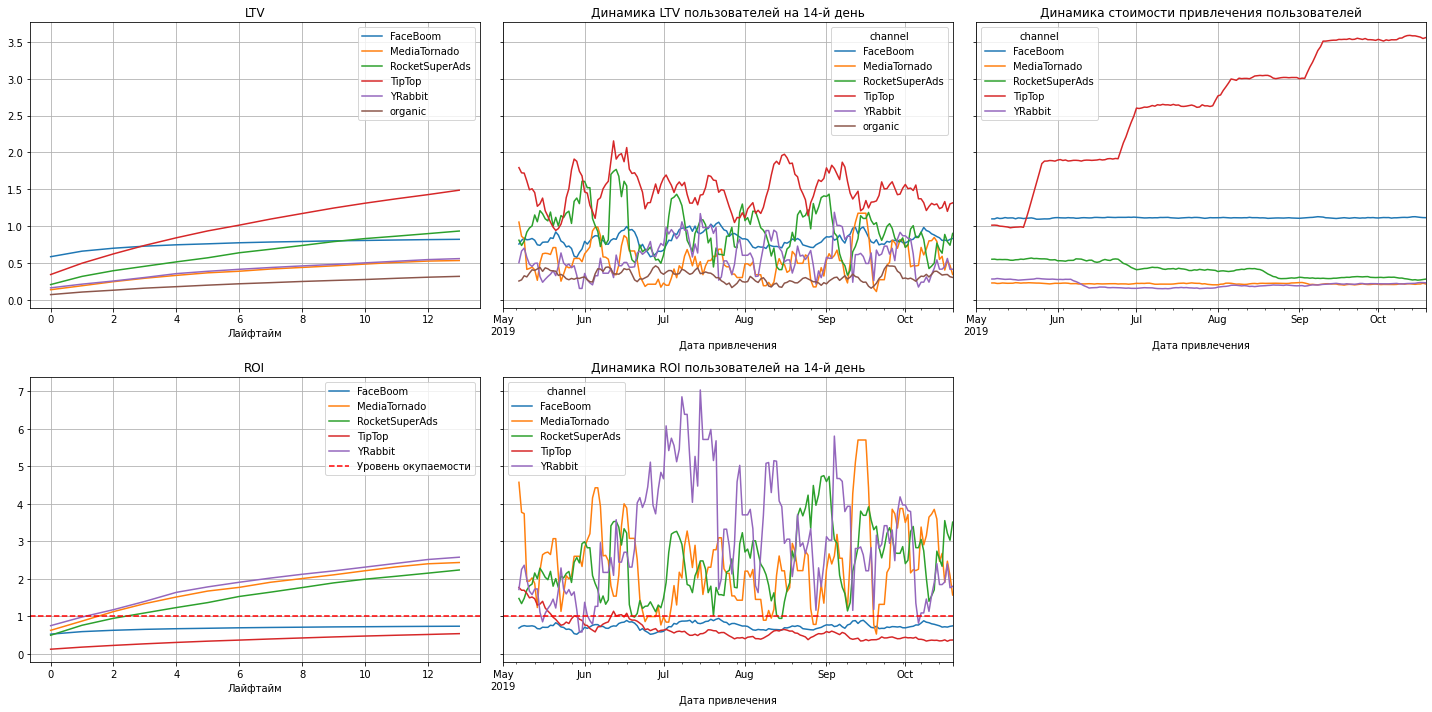

In [56]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtered_us,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

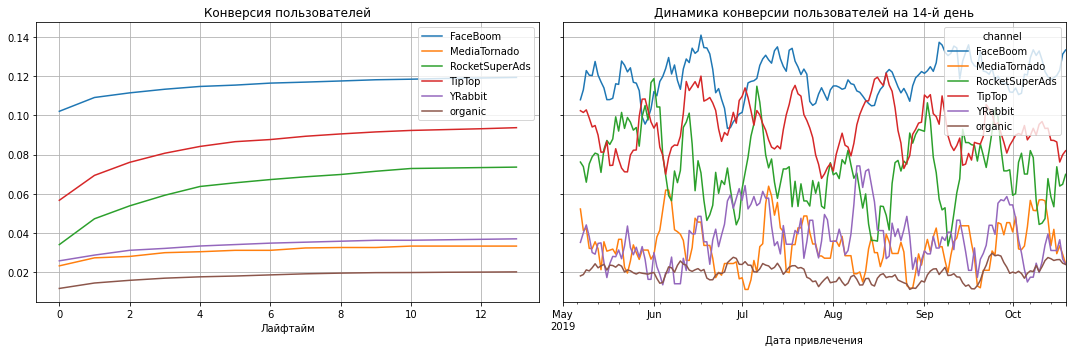

In [57]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtered_us,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, horizon) 

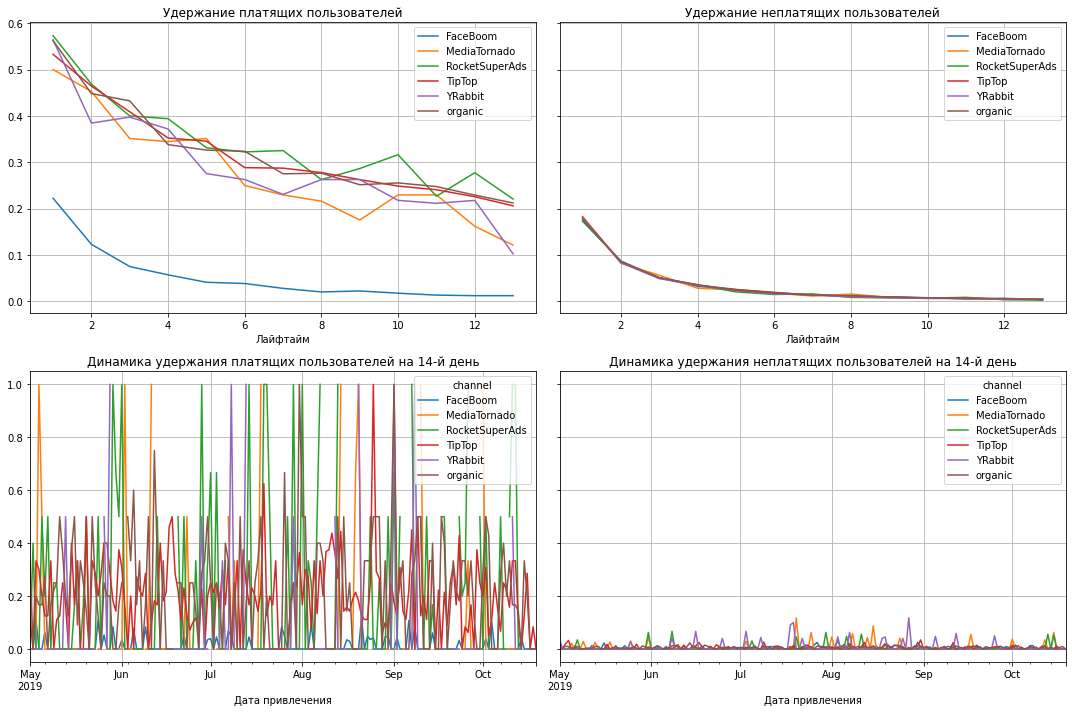

In [58]:
result_raw, retention, retention_history = get_retention(
    profiles_filtered_us, visits, observation_date,
    horizon, dimensions=['channel'])
plot_retention(retention, retention_history, horizon)

<b>Выводы по рекламным каналам для USA</b>
    
1. Самый высокий LTV в USA у TipTop
2. В динамике LTV картина в целом соответствует графику LTV по горизонту наблюдения.
3. Динамика CAC показывает постоянное скачкообразное увеличение затрат из TipTop в начале каждого месяца. Для RocketSuperAds и YRabbit заметно небольшое снижение CAC.
5. ROI из YRabbit, MediaTornado и RocketSuperAds демонстрируют выход на окупаемость уже на 2-й и 3-й дни. ROI из FaceBoom и TipTop так и не достигают единицы за весь горизонт наблюдения.
6. В динамике ROI в июле наблюдаются рекордные пиковые значения у YRabbit, в остальном картина соответствует графику ROI по горизонту наблюдения .
7. Наиболее высокая конверсия наблюдается из каналов FaceBoom, TipTop и RocketSuperAds.
8. Положение графиков динамики конверсии от каналов соответствует положению на графике по горизонту наблюдения. При этом наблюдаются периодические всплески и спады с циклом около месяца. 
9. На графике удержания платящих пользователей заметны значительно более низкие показатели у FaceBoom.
10. Удержание неплатящих пользователей между каналами практически не отличается.
11. По динамике удержания платящих пользователей значения колеблются от 0% до 100%.
12. По динамике удержания неплатящих пользователей показатели очень маленькие с периодическими всплесками до 10%.

<h4>Рассмотрим показатели с разбивкой по рекламным каналам для европейских стран</h4>

In [59]:
profiles_filtered_eu = profiles[profiles['region']!='United States']

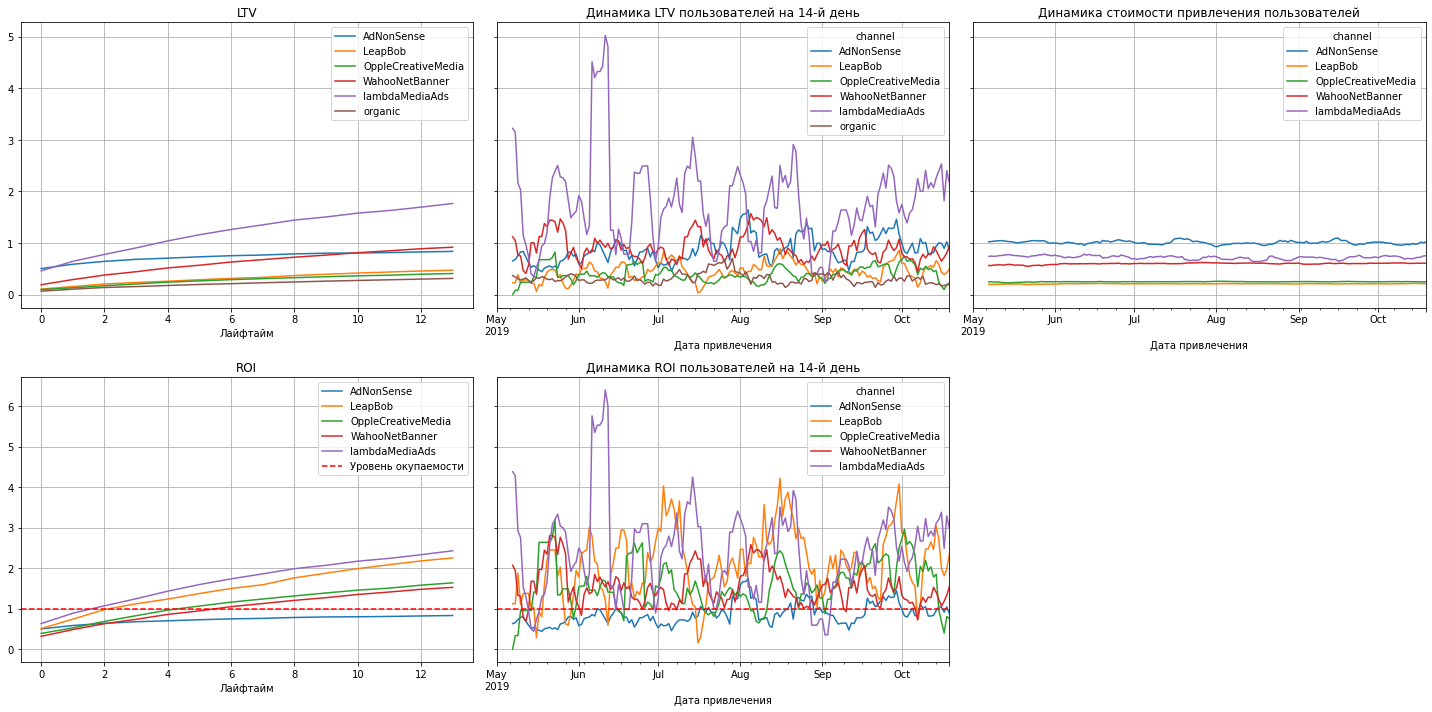

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_filtered_eu,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

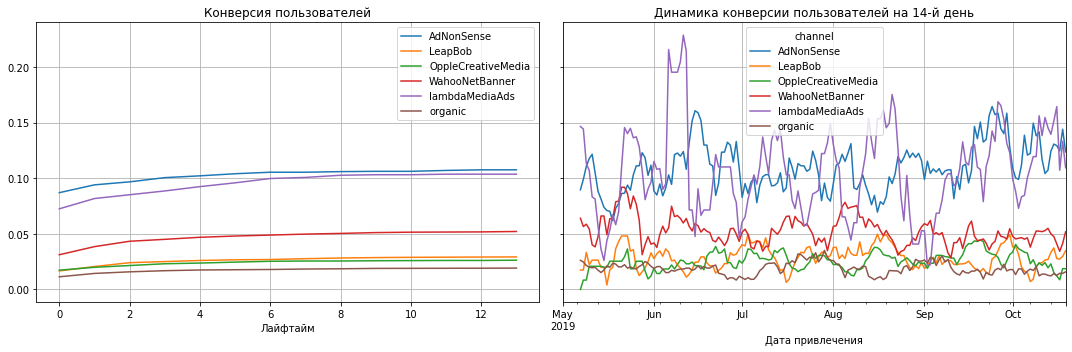

In [61]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_filtered_eu,
    orders,
    observation_date,
    horizon,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, horizon) 

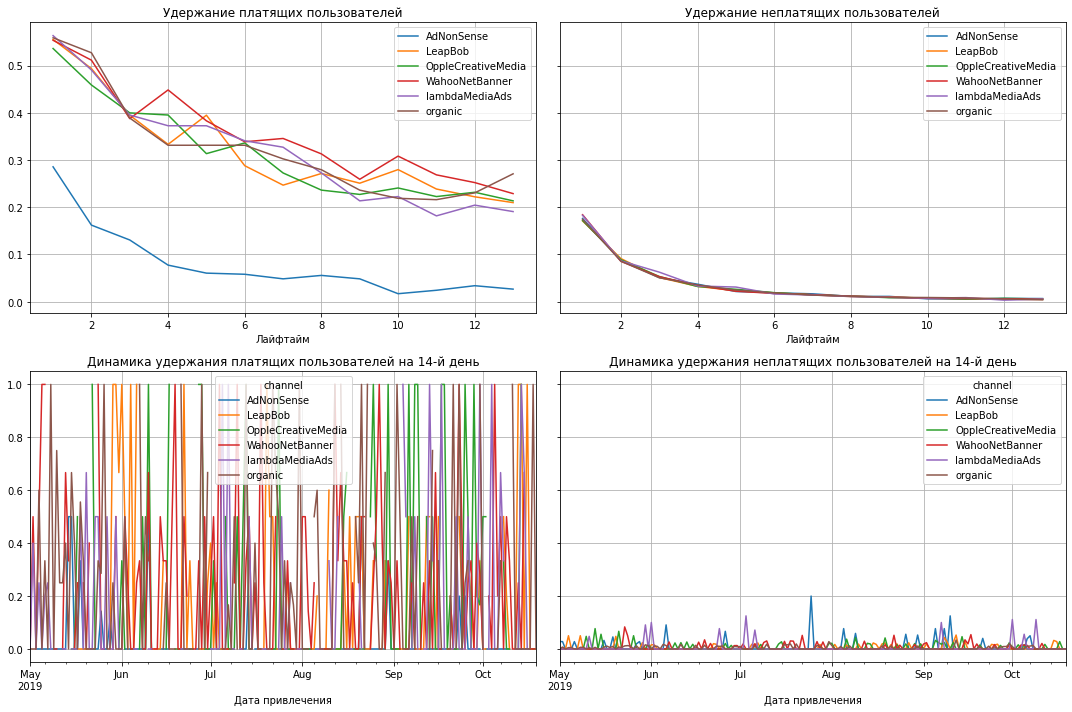

In [62]:
result_raw, retention, retention_history = get_retention(
    profiles_filtered_eu, visits, observation_date,
    horizon, dimensions=['channel'])
plot_retention(retention, retention_history, horizon)

<b>Выводы по рекламным каналам для европейских стран</b>
    
1. Самый высокий LTV в у AdNoneSense.
2. В динамике LTV картина в целом соответствует графику LTV по горизонту наблюдения. Но чем выше положение канала на предыдущем графике, тем выше у него пики значений с цикличностью приблизительно в месяц. 
3. Динамика CAC показывает минимальные, почти неотличимые колебания.
4. Наибольшие ROI из LambdaMediaAds и LeapBob. Посетители из канала OppleCreativeMedia не достигают ROI в 1
6. В динамике ROI наблюдается цикличность роста и падения с периодом 1,5 - 2 месяца.
7. Наиболее высокая конверсия наблюдается из каналов AdNoneSense и LambdaMediaAds.
8. Положение графиков динамики конверсии от каналов соответствует положению на графике по горизонту наблюдения. При этом наблюдаются периодические всплески и спады. 
9. На графике удержания платящих пользователей заметны значительно более низкие показатели у AdNoneSense.
10. Удержание неплатящих пользователей между каналами практически не отличается.
11. По динамике удержания платящих пользователей значения колеблются от 0% до 100%.
12. По динамике удержания неплатящих пользователей показатели очень маленькие с периодическими всплесками до 10%-20%.

#### Выводы по оценке окупаемости рекламы

В целом, с учетом горизонта наблюдения в 14 дней, реклама не окупается.

Худшие показатели ROI, оказывающие наболее негативной влияние на показатель окупаемости рекламы:
- у устройств Apple (Mac и iPhone);
- у страны United States (где соответствующие устройства и имеют максимальную долю у пользователей);
- у рекламных каналов TipTop и FaceBoom, а также AdNonSense.

Проблемы окупаемости могут быть вызваны:
- плохой адаптацией рекламы или приложения под устройства Apple;
- не учитывание отличия часовых поясов (времени суток) или менталитета USA;
- техническими проблемами настройки рекламы в каналах TipTop, FaceBoom, AdNonSense.

##### Вывод

Основной вывод - на данный момент в целом реклама не окупается.
Среди предполагаемых причин:
- плохая адаптация рекламы или продвигаемого приложения под устройства Apple;
- отсутствие учета отличия часовых поясов (времени суток) или менталитета USA;
- технические проблемами настройки рекламы в каналах TipTop, FaceBoom, AdNonSense.

Рекомендации отделу маркетинга:
- в ближайшее время отключить рекламу в TipTop, FaceBoom, AdNonSense, а также в регионе USA, также на всех устройствах Apple;
- проанализировать отображение рекламы на устройствах Apple;
- проверить время выхода рекламы в USA;
- проверить работоспобность продвигаемого приложения на устройчствах Apple;
- провести аудит настроек рекламы в TipTop (в том числе найти причину ежемесячного скачкообразного увеличения CAC), FaceBoom, AdNonSense;
- рассмотреть возможножность масштабирования рекламы в каналах YRabbit, lambdaMediaAds, LeapBob, RocketSuperAds, а также на пользователей с доступом с утройств 'PC'.

### Итоговые выводы
В результате проведения работы были решены задачи:
- подготовлены данные к анализу;
- сформированы функции для для расчёта и анализа бизнес-показателей, визуального представления информации;
- проведен исследовательский анализ по характеру имеющихся данных;
- проведен анализ расходов на маркетинг;
- оценена окупаемость рекламы.

Основной вывод - на данный момент в целом реклама не окупается.

Среди предполагаемых причин низкой эффективности рекламы:
- снижение эффективности используемого креатива после первых двух месяцев периода наблюдения;
- плохая адаптация рекламы или продвигаемого приложения под устройства Apple;
- отсутствие учета отличия часовых поясов (времени суток) или менталитета USA;
- технические проблемы настройки рекламы в каналах TipTop, FaceBoom, AdNonSense.

Основные рекомендации для отдела маркетинга.
- в ближайшее время отключить рекламу в TipTop, FaceBoom, AdNonSense, а также в регионе USA, также на всех устройствах Apple;
- менять используемый креатив каждые 1-2 месяца;
- рассмотреть возможность масштабирования рекламы в каналах YRabbit, lambdaMediaAds, LeapBob, RocketSuperAds, а также на пользователей с доступом с утройств 'PC'; в том числе имеет смысл изучить передовую практику и распространить ее на другие способы привлечения клиентов:
 - высокий ROI в июне и августе в UK;
 - высокие показатели LTV у пользователей, привлеченных в канале lambdaMediaAds;
 - высокий ROI у пользователей, привлеченных в канале YRabbit в регионе USA;
- проанализировать отображение рекламы на устройствах Apple;
- проверить время суток выхода рекламы в USA;
- проверить работоспобность продвигаемого приложения на устройствах Apple;
- провести аудит настроек рекламы в TipTop (в том числе найти причину ежемесячного скачкообразного увеличения CAC), FaceBoom, AdNonSense.

Также дополнительно рекомендуется:
- провести анализ с более длинным горизонтом наблюдения, все-таки приложение про прокрастинацию;
- провести анализ с более детальными срезами с пересечением нескольких измерений (каналы, устройства, страны)
- сопоставить показатели окупаемости с изменениями в рекламных кампаниях.